In [1]:
#Importing essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the data and taking a look at it
data = pd.read_csv("car_data.csv")
data.shape

(301, 9)

There are different questions you need to answer by analysing this data -
1. From which manufacturing year to which manufacturing year vehicles are present in this data ?
2. What is the lowest price to which a vehicle is sold ?
3. What is the highest price to which a vehicle is sold ?
4. How many records are there in this data ?
5. Are there any missing records in this data ?
6. How many different vehicles are present in this data ?
7. Which is the most sold vehicle in this data ?
8. Does the database include any CNG vehicle ? If yes how many of them are there ?
9. How many vehicles here are for sell from Individuals directly ?
10. Does this database contain auto transmission vehicles ? If yes how many of them are there ?
11. How many single person owned vehicles are there in this database ?
12. Which is the most and least cost depreciated vehicle in data ?
13. Which brands of vehicles are less affected by cost depreciation ?
14. Are there any factors which you feel affect the cost depreciation ?
15. In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?
16. Can we get idea about newest vehicles i.e. after 2014 manufactured ?
17. Can we find out data of only two wheelers from this data ?
18. Which is the oldest bike sold here?
19. Which is the newest bike sold here?
20. Which is the most sold bike here?
21. Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?
22. Can we find out data of only cars from this data ?
23. Which is the oldest car sold here?
24. Which is the newest car sold here?
25. Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

In [5]:
data.shape

(301, 9)

In [6]:
#To check the statistical features of the data
data.describe()  # The statistical features are only for numeric variables

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data['Selling_Price'].mean()

4.661295681063127

From above analysis one can say that -
1. The data here contains cars with manufacturing year 2003 to 2018.
2. The lowest price on which car was sold is INR 10,000 / -
3. The highest price on which the car was sold is INR 35 lacs.
4. There are 301 recoords in the data.

In [8]:
#To look at the variables in detail
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [3]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

From above analysis one can say that -
1. None of the variables or columns here have null values.
2. Variables "Car_Name" , "Fuel_Type" ,"Seller_Type" and "Transmission" are non numeric in nature.

In [6]:
#Checking whether non numeric variables are categorical in nature
print(data.Car_Name.value_counts())

city                   26
corolla altis          16
verna                  14
fortuner               11
brio                   10
                       ..
Hyosung GT250R          1
Hero Super Splendor     1
Bajaj  ct 100           1
Hero Passion X pro      1
Yamaha Fazer            1
Name: Car_Name, Length: 98, dtype: int64


<Axes: xlabel='count', ylabel='Car_Name'>

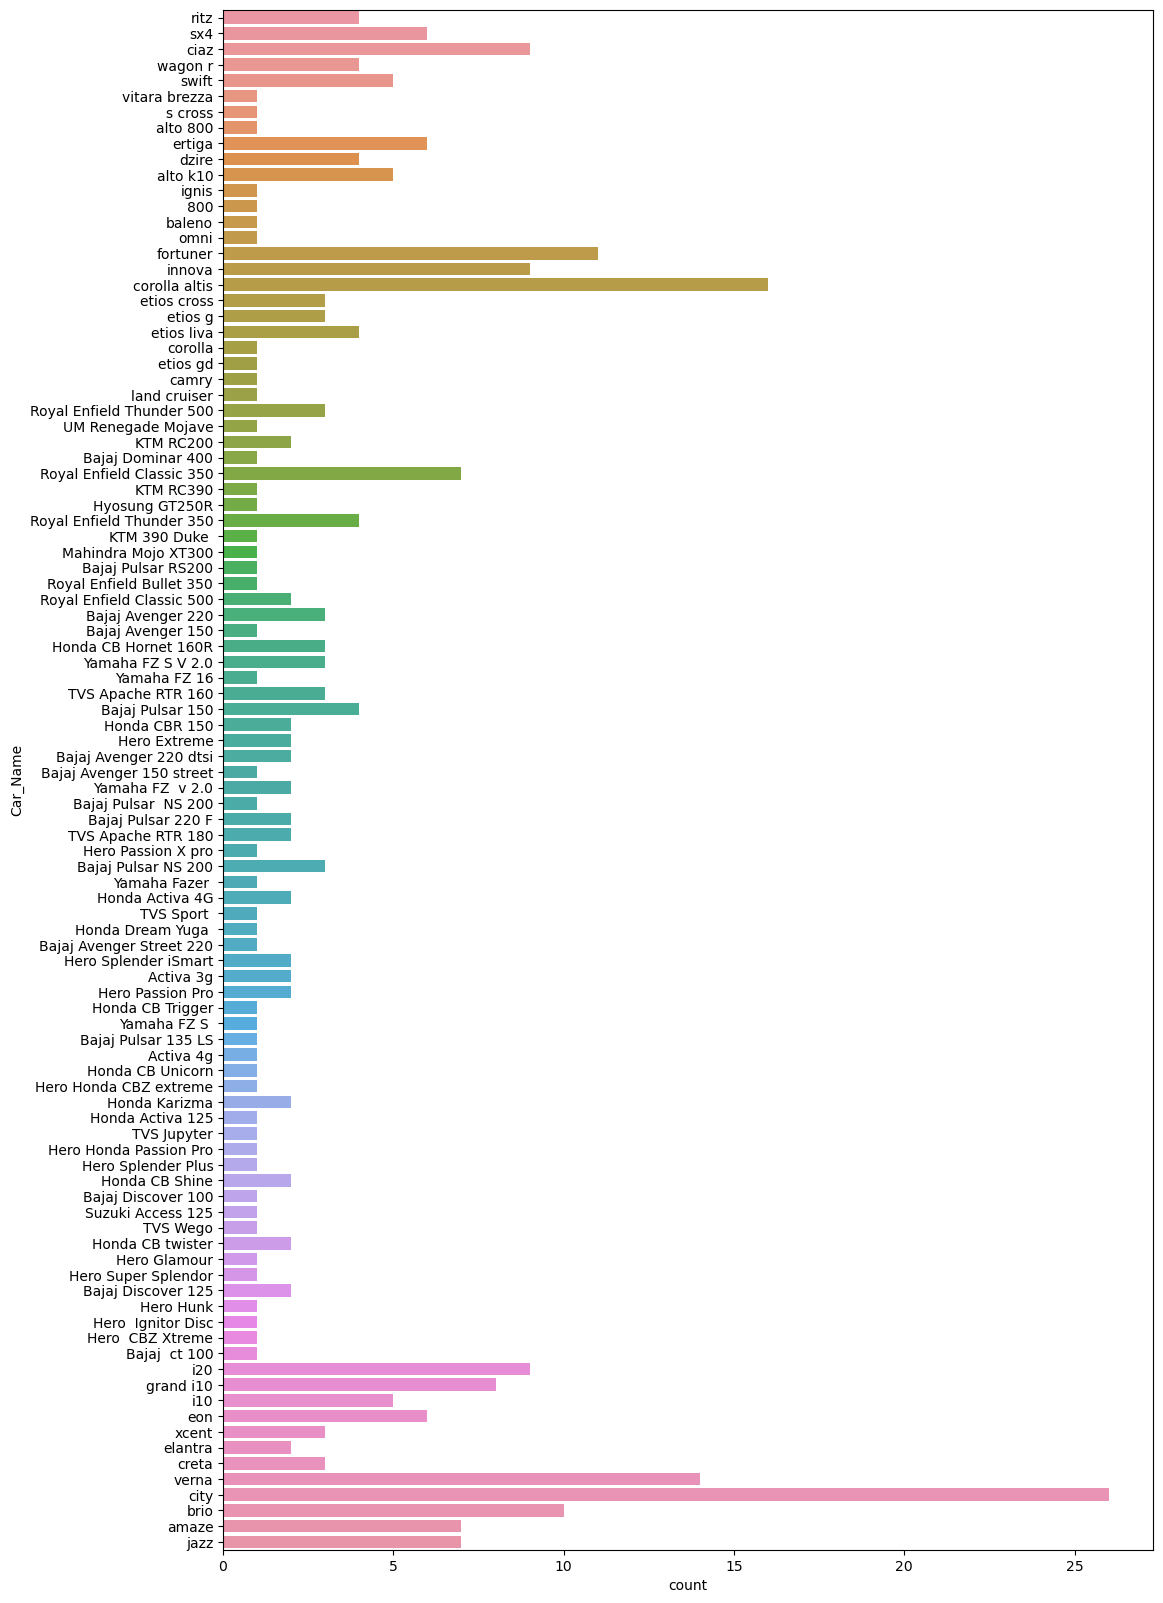

In [3]:
fig_dims = (12, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = data.Car_Name,ax=ax, data = data)

There are 98 different vehicles in the data. It contains bikes and mopets too. Variable is categorical.

In [7]:
data.head()  

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
print(data.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [4]:
print(data.Fuel_Type.unique())

['Petrol' 'Diesel' 'CNG']


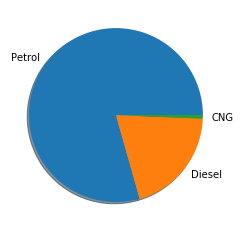

In [7]:
plt.pie(data.Fuel_Type.value_counts(), labels=["Petrol","Diesel","CNG"],shadow = True)
plt.show()

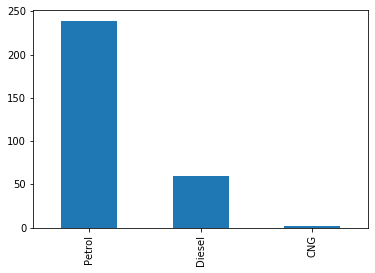

In [8]:
data.Fuel_Type.value_counts().plot.bar()

The data contains mostly petrol vehicles.This variable is skewed.Variable is categorical.

In [9]:
print(data.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


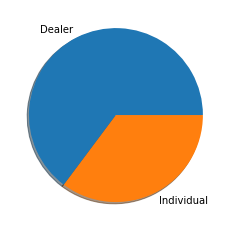

In [10]:
plt.pie(data.Seller_Type.value_counts(), labels=["Dealer","Individual"],shadow = True)
plt.show()

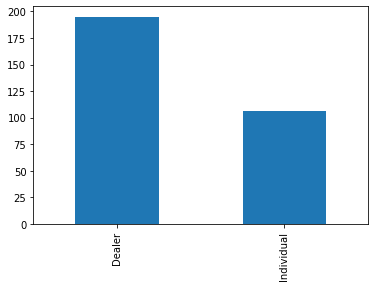

In [11]:
data.Seller_Type.value_counts().plot.bar()

The vehicles in data are mostly avalilable with dealers.This variable is skewed.Variable is categorical.

In [12]:
print(data.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
data.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


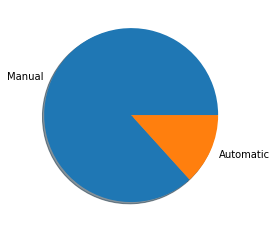

In [13]:
plt.pie(data.Transmission.value_counts(), labels=["Manual","Automatic"],shadow = True)
plt.show()

<AxesSubplot:>

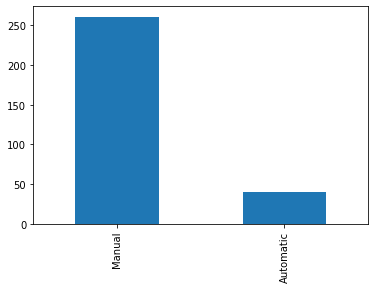

In [15]:
data.Transmission.value_counts().plot.bar()

The vehicles in data are mostly manual transmission types. This variable is skewed.Variable is categorical.

One needs to convert these categorical variables to numeric for machine learning implementation. However decision about the variable "Car_Name" can be taken on the basis of the problem at hand.

In [14]:
#Looking at the number of owners for vehicles
data.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

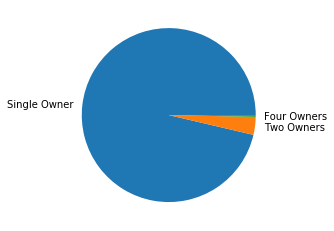

In [16]:
plt.pie(data.Owner.value_counts(), labels=["Single Owner","Two Owners","Four Owners"])#,shadow = True)
plt.show()

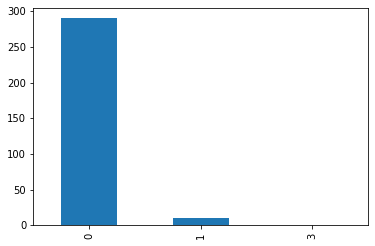

In [17]:
data.Owner.value_counts().plot.bar()

Mostly the vehicles are from their first owner only.

In [6]:
#Highest depreciation observed from the vehicles in data
data['Depreciation'] = data['Present_Price'] - data['Selling_Price']
data.loc[data.Depreciation == data.Depreciation.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0,57.6


In [7]:
#Lowest depreciation observed from the vehicles in data
data[data.Depreciation == data.Depreciation.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0,0.03


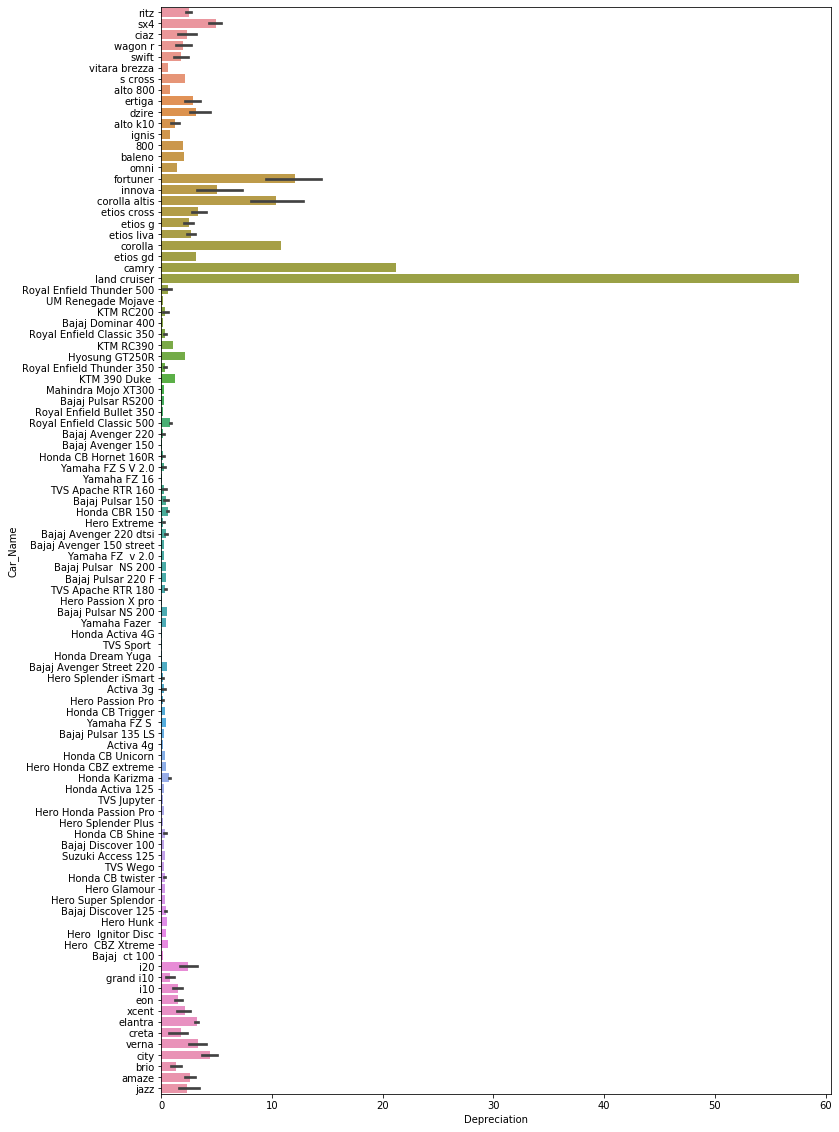

In [20]:
fig_dims = (12, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = data.Depreciation,y = data.Car_Name,ax=ax, data = data)

Depreciation for vehicles definitely depend on year of manufacturing and kilometers driven. Also one can note that
depreciation is substantially less in brands Maruti Suzuki and Hyundai as compared to other luxury vehicles.

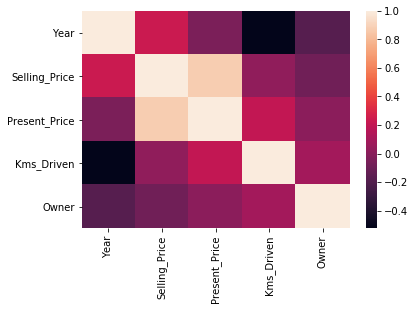

In [11]:
#To check the correlation of different variables look at the heatmap
cor = data.corr()
sns.heatmap(cor)

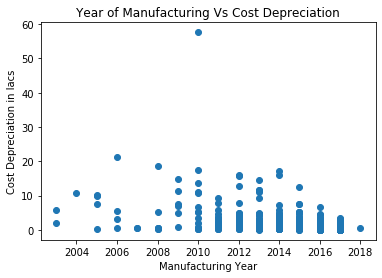

In [22]:
plt.scatter(data.Year,data.Depreciation)
plt.xlabel("Manufacturing Year")
plt.ylabel("Cost Depreciation in lacs")
plt.title("Year of Manufacturing Vs Cost Depreciation")
plt.show()

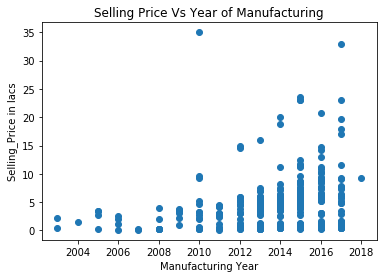

In [23]:
plt.scatter(data.Year,data.Selling_Price)
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling_Price in lacs")
plt.title("Selling Price Vs Year of Manufacturing")
plt.show()

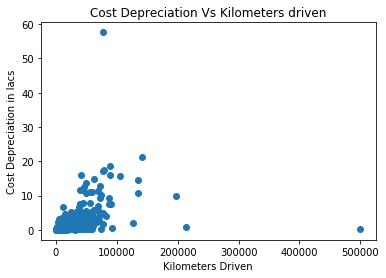

In [24]:
plt.scatter(data.Kms_Driven,data.Depreciation)
plt.xlabel("Kilometers Driven")
plt.ylabel("Cost Depreciation in lacs")
plt.title("Cost Depreciation Vs Kilometers driven")
plt.show()

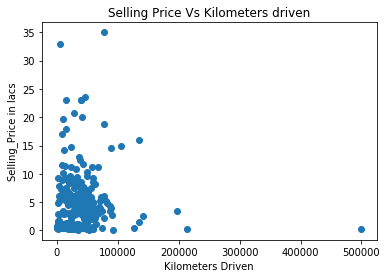

In [25]:
plt.scatter(data.Kms_Driven,data.Selling_Price)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling_Price in lacs")
plt.title("Selling Price Vs Kilometers driven")
plt.show()

In [26]:
#Check out the newest vehicles on sale - 2015 or after 2015 manufactured
new_vehicles = data[data['Year'] >= 2015]
new_vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,1.37
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,2.11
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.14


In [27]:
new_vehicles.reset_index(drop = True, inplace = True)
new_vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
1,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58
2,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,1.37
3,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,2.11
4,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.14


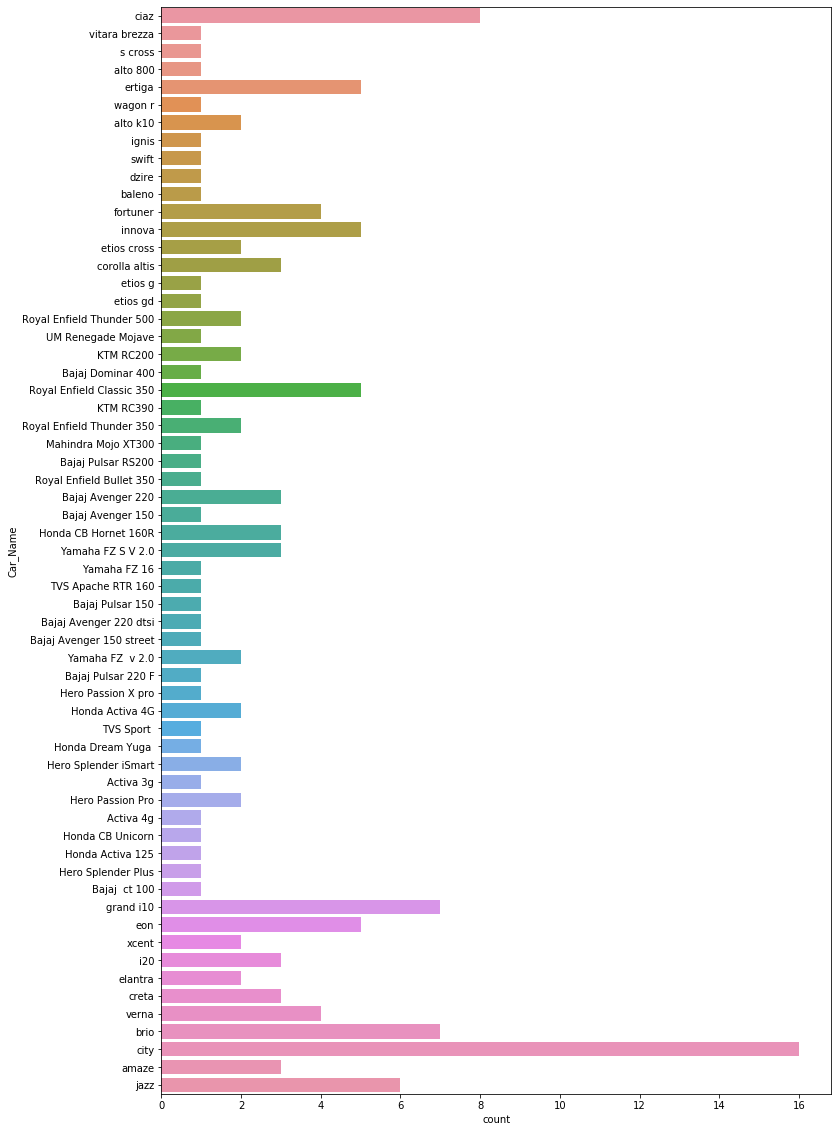

In [28]:
fig_dims = (12, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = new_vehicles.Car_Name,ax=ax, data = new_vehicles)

In [30]:
#Check out two wheelers from data of vehicles
two_wheelers = data[data["Present_Price"] < 3.5]
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
23,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0,0.96
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,1.93
44,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0,1.44
100,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
101,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12


In [31]:
two_wheelers.reset_index(drop = True, inplace = True)
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0,0.96
1,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,1.93
2,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0,1.44
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12


In [32]:
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "alto k10"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "800"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "omni"]
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12
5,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13
6,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15
7,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12


In [33]:
two_wheelers.reset_index(drop = True, inplace = True)
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13
3,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15
4,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12


<AxesSubplot:xlabel='count', ylabel='Car_Name'>

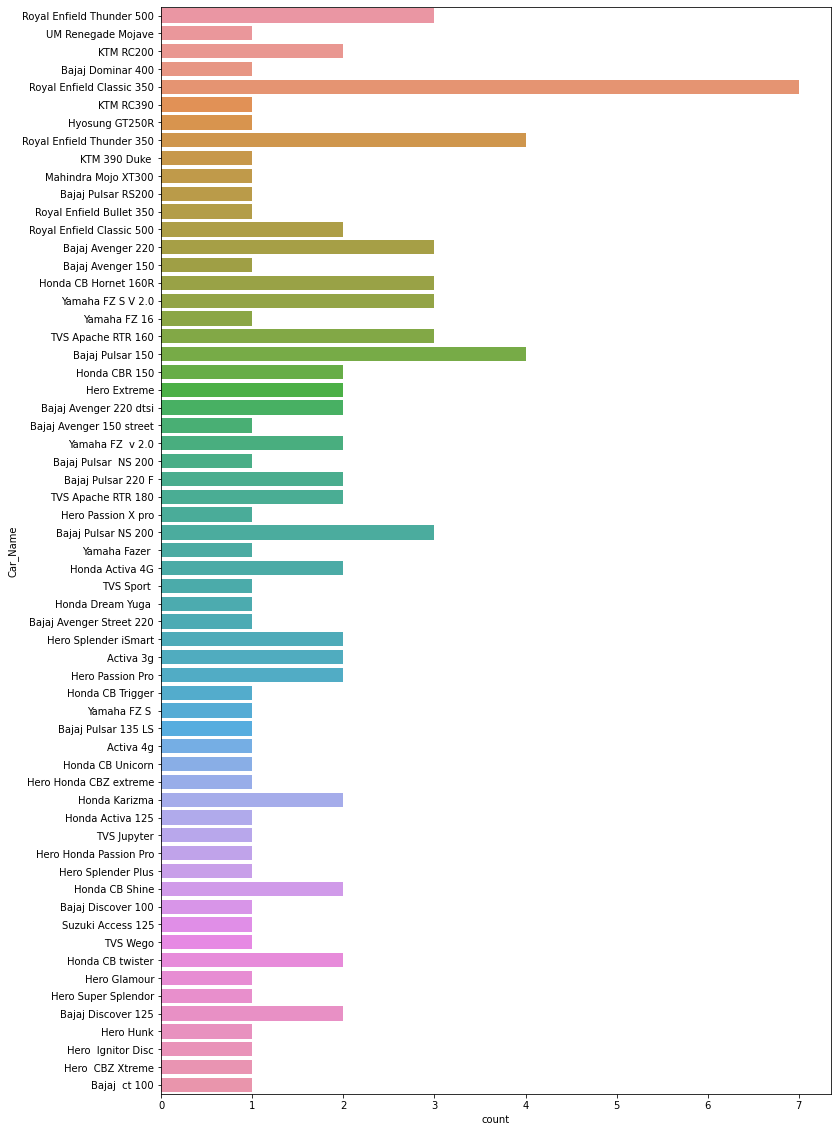

In [34]:
fig_dims = (12, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = two_wheelers.Car_Name,ax=ax, data = two_wheelers)

In [35]:
#Which is the oldest bike sold here?
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
89,Hero Super Splendor,2005,0.2,0.57,55000,Petrol,Individual,Manual,0,0.37


This signifies that Hero brand bikes carry market value even if they are pretty old.

In [36]:
#Which is the newest bike sold here?
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13
3,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15
4,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12
9,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0,0.27
26,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0,0.05
28,Honda CB Hornet 160R,2017,0.80,0.87,3000,Petrol,Individual,Manual,0,0.07
29,Yamaha FZ S V 2.0,2017,0.78,0.84,5000,Petrol,Individual,Manual,0,0.06
30,Honda CB Hornet 160R,2017,0.75,0.87,11000,Petrol,Individual,Manual,0,0.12
32,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0,0.20


This signifies Bajaj , Royal Enfield and Honda brand two wheelers have very low retention rate with users.

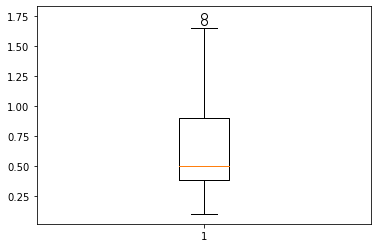

In [37]:
#To check whether any deal about two wheelers exceeded general expectation
plt.boxplot(two_wheelers.Selling_Price)
plt.show()

In [38]:
two_wheelers[two_wheelers.Selling_Price > 1.6]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13


In [39]:
two_wheelers[two_wheelers.Car_Name == "Hyosung GT250R"]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
6,Hyosung GT250R,2014,1.35,3.45,16500,Petrol,Individual,Manual,1,2.1


In [40]:
#Looking at cars only from vehicles data
cars = data[data["Present_Price"] > 2.0]
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


In [41]:
cars.reset_index(drop = True, inplace = True)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


<AxesSubplot:xlabel='count', ylabel='Car_Name'>

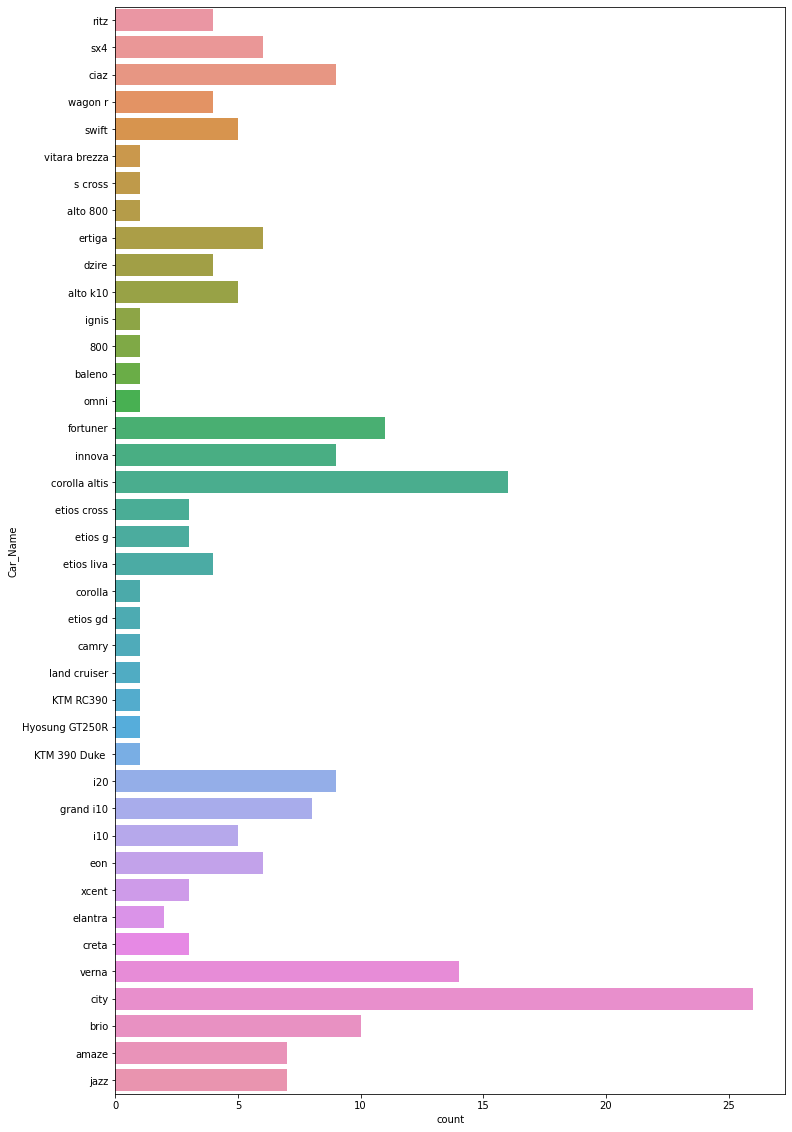

In [42]:
fig_dims = (12, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = cars.Car_Name,ax=ax, data = cars)

In [43]:
cars = cars.loc[cars.Car_Name != "KTM RC390"]
cars = cars.loc[cars.Car_Name != "Hyosung GT250R"]
cars = cars.loc[cars.Car_Name != "KTM 390 Duke"]
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


<AxesSubplot:xlabel='count', ylabel='Car_Name'>

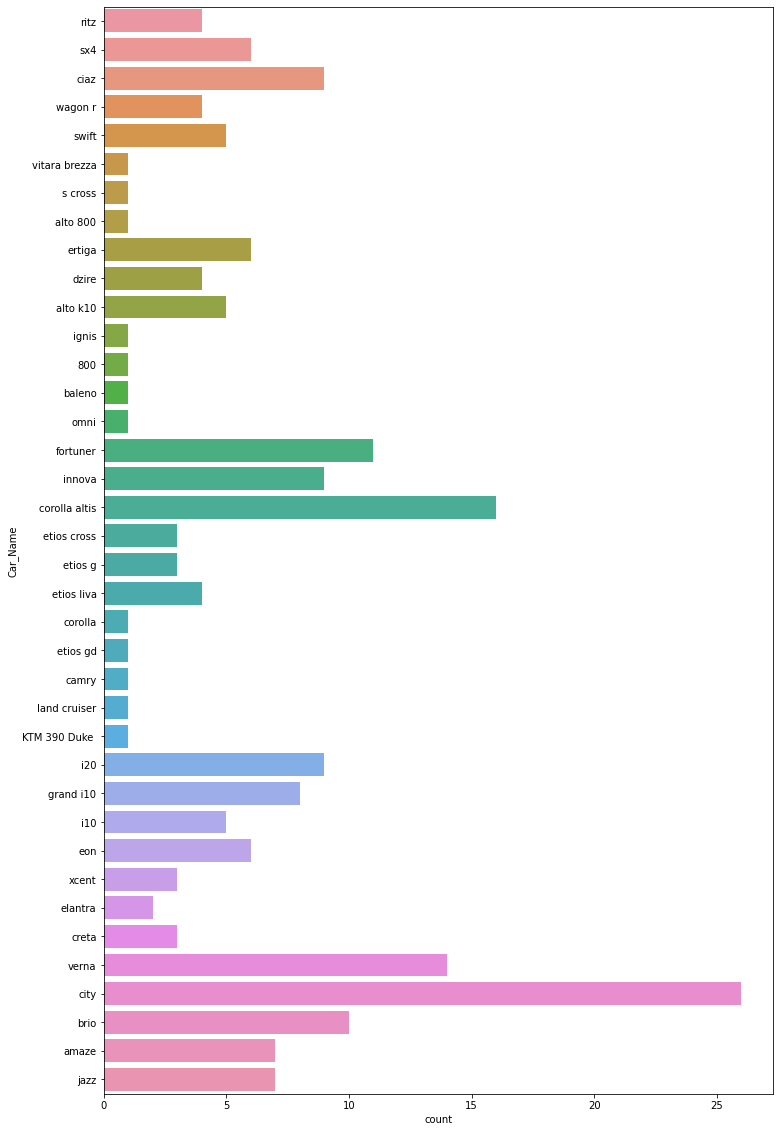

In [44]:
fig_dims = (12, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = cars.Car_Name,ax=ax, data = cars)

In [45]:
cars = cars.loc[cars.Car_Name != "KTM 390 Duke "]

<AxesSubplot:xlabel='count', ylabel='Car_Name'>

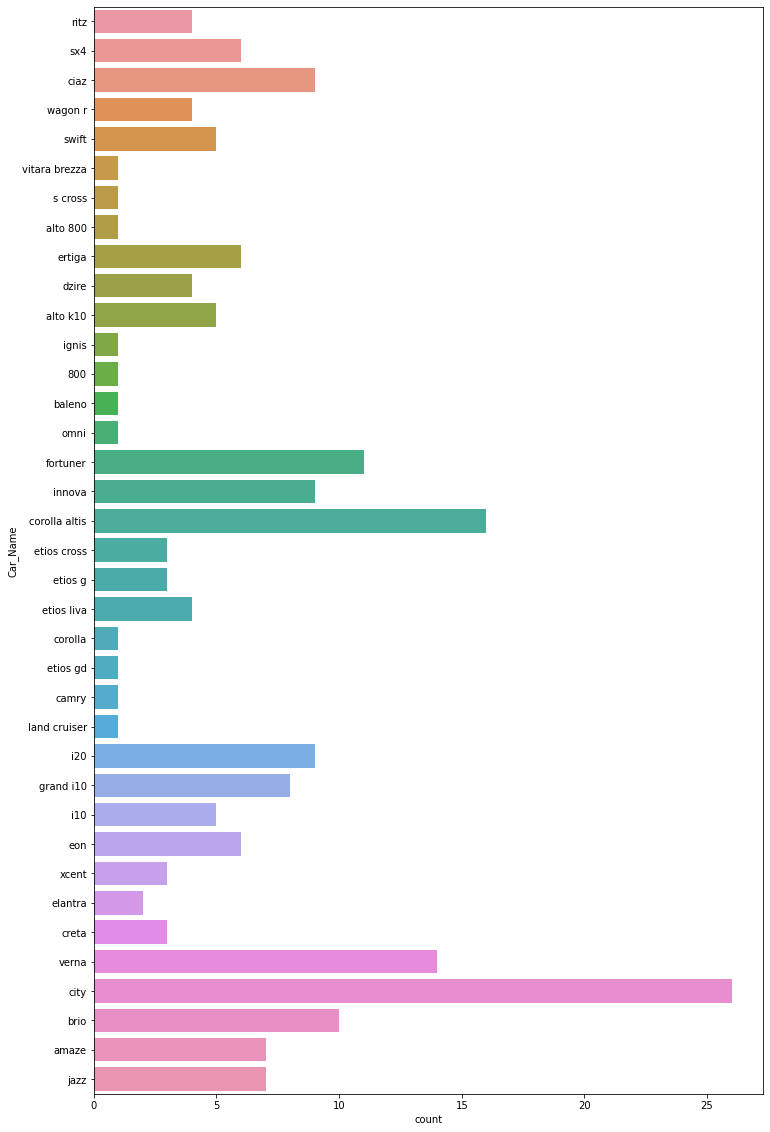

In [46]:
fig_dims = (12, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y = cars.Car_Name,ax=ax, data = cars)

In [47]:
cars.reset_index(drop = True, inplace = True)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


In [48]:
#Which is the oldest car sold here?
cars.loc[cars.Year == cars.Year.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,1.93
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0,5.73


In [49]:
#Which is the newest car sold here?
cars.loc[cars.Year == cars.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58


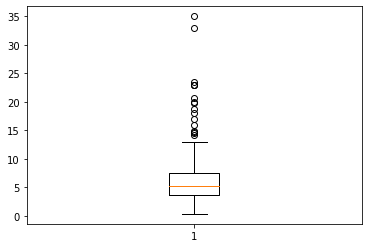

In [50]:
#To check whether any deal about cars exceeded general expectation
plt.boxplot(cars.Selling_Price)
plt.show()

It seems that many cars got exceptional deals here but we need to keep in mind that data contains cars from 
lowest to highest price range.So to get a clear picture distribution of selling and present price can be checked.

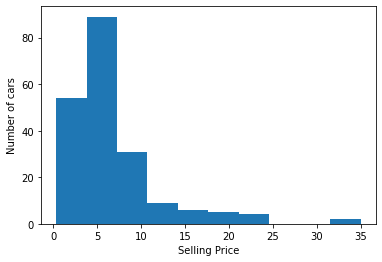

In [51]:
plt.hist(cars.Selling_Price)
plt.xlabel("Selling Price")
plt.ylabel("Number of cars")
plt.show()

<AxesSubplot:xlabel='Selling_Price'>

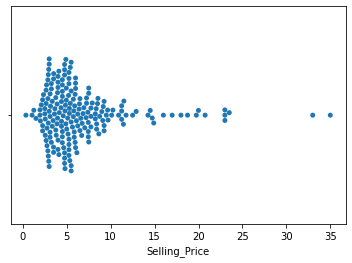

In [52]:
sns.swarmplot(x = cars.Selling_Price)

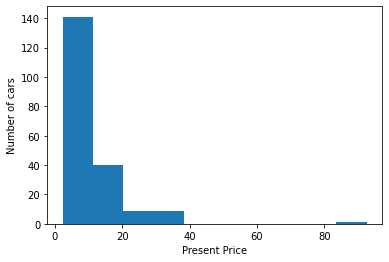

In [53]:
plt.hist(cars.Present_Price)
plt.xlabel("Present Price")
plt.ylabel("Number of cars")
plt.show()

<AxesSubplot:xlabel='Selling_Price'>

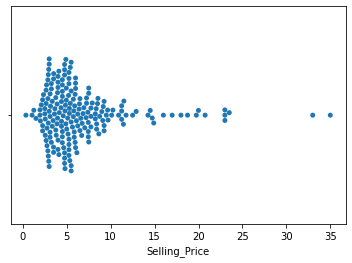

In [54]:
sns.swarmplot(x = cars.Selling_Price)

This shows that most of the cars were sold in the range below 10 lacs. So any luxury car deal above this range is 
seem to be deal which exceed expectations which is however is not true as luxury cars have their obvious price 
very high.